In [82]:
from Bio.PDB import PDBParser, PDBIO, internal_coords
import numpy as np
import matplotlib.pyplot as plt

In [35]:
parser = PDBParser()
structure = parser.get_structure("5IRE", "5ire.pdb")

In [48]:
model = structure.child_list[0]

In [49]:
chain = model.child_list[0]

In [72]:
def dihedral(a, b, c, d):
    # calculating vectors in planes
    ab = b - a
    bc = c - b
    cd = d - c

    # calculating normal vectors n1 and n2 of planes:
    n1 = np.cross(ab, bc)
    n2 = np.cross(bc, cd)
    #print("n1: " + str(n1))
    #print("n2: " + str(n2))

    # cos(thetha) for planes ab bc and bc cd
    cos_theta = (np.dot(n1, n2))/(np.linalg.norm(n1)*np.linalg.norm(n2))
    #print("cos theta: " + str(cos_theta))

    # sin(thetha) for the same planes
    sin_theta = np.dot(np.cross(n1, n2), bc)/(np.linalg.norm(n1)*np.linalg.norm(n2)*np.linalg.norm(bc))
    #print("sin theta: " + str(sin_theta))

    # calculating theta
    theta = np.arctan2(sin_theta, cos_theta)

    return theta*180/np.pi

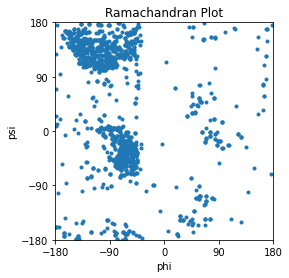

<Figure size 1440x1440 with 0 Axes>

In [100]:
phi_psi = []
for model in structure.get_models():
    for chain in model.get_chains():
        aa1 = None
        aa2 = None
        for aa0 in chain.get_residues():
            if aa1 and aa2: # only true for fully enclosed amino acids (not first and last)
                CA_prev = aa2.child_dict["CA"].get_coord()
                N = aa1.child_dict["N"].get_coord()
                CA = aa1.child_dict["CA"].get_coord()
                C = aa1.child_dict["C"].get_coord()
                N_next = aa0.child_dict["N"].get_coord()
                phi = dihedral(CA_prev, N, CA, C)
                psi = dihedral(N, CA, C, N_next)
                phi_psi.append([phi, psi])
            aa2 = aa1
            aa1 = aa0
plt.scatter([phi[0] for phi in phi_psi], [psi[1] for psi in phi_psi], marker='.')
plt.title("Ramachandran Plot")
plt.xlabel("phi")
plt.ylabel("psi")
plt.xlim([-180, 180])
plt.ylim([-180, 180])
plt.xticks([-180, -90, 0, 90, 180])
plt.yticks([-180, -90, 0, 90, 180])
ax = plt.gca()
ax.set_aspect('equal', adjustable='box')
plt.figure(figsize=(20,20))
plt.savefig('test.pdf')

In [103]:
def dihedral(a, b, c, d):
    # calculating vectors in plane 1
    ba = a - b
    bc = c - b
    # calculating normal vector of plane 1
    n1 = np.cross(ba, bc)

    # vectors in plane 2
    cb = b - c
    cd = d - c
    # normal vector of plane 2
    n2 = np.cross(cb, cd)

    # angle between both planes:
    dot_ab = np.dot(n1, n2)
    norm_ab = np.linalg.norm(n1)*np.linalg.norm(n2)
    alpha = np.arccos(dot_ab/norm_ab)

    return alpha*180/np.pi
